# Main Ingredients

Now that you have learned many of the fundamental procedures executed in deep learning models, the notebooks that follow will provide various examples using the Python API. These notebooks are designed to closely mirror the R notebooks provided throughout the class. For example, this notebook mirrors the https://misk-data-science.github.io/misk-dl/notebooks/01-main-ingredients.nb.html notebook.

## Package Requirements

In [1]:
# utility packages
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# modeling packages
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_blobs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import utils

## Simple Linear Regression

In [2]:
n = 1000   # n observations
b = 30     # intercept
a = 5      # slope

In [3]:
random.seed(123)
X = [random.uniform(-1, 1) for ob in range(n)]
y = [b + a*ob + random.uniform(-1, 1) for ob in X]

df = pd.DataFrame({'X': X, 'y': y})
df.head()

,X,y
0,-0.895273,24.651331
1,-0.825627,26.812954
2,-0.185516,29.257534
3,-0.784600,26.488911
4,0.802398,34.809165


<AxesSubplot:xlabel='X', ylabel='y'>

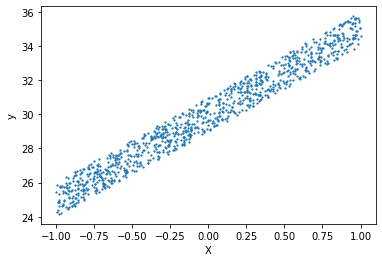

In [4]:
df.plot.scatter(x='X', y='y', s=1.5)

In [5]:
X = df[['X']]
y = df['y']

reg = LinearRegression().fit(X, y)

print(f'''
estimated intercept = {reg.coef_}
estimated slope = {reg.intercept_}
loss score = {mean_squared_error(y, reg.predict(X))}
''')


estimated intercept = [5.03266661]
estimated slope = 29.99919365105621
loss score = 0.3347023404237653



## Simple regression with a perceptron

In [6]:
# define the keras model
model = Sequential()
model.add(Dense(units=1, input_dim=1))

2021-10-25 17:02:48.773802: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
# compile the keras model
model.compile(loss='mse', optimizer='sgd')

In [8]:
# Fit the model
model.fit(X, y, batch_size=32, epochs=15)

2021-10-25 17:02:48.996194: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15
32/32 [==============================] - 0s 730us/step - loss: 526.6061
Epoch 2/15
32/32 [==============================] - 0s 621us/step - loss: 149.5764
Epoch 3/15
32/32 [==============================] - 0s 639us/step - loss: 44.6974
Epoch 4/15
32/32 [==============================] - 0s 587us/step - loss: 14.8156
Epoch 5/15
32/32 [==============================] - 0s 492us/step - loss: 5.6598
Epoch 6/15
32/32 [==============================] - 0s 734us/step - loss: 2.7052
Epoch 7/15
32/32 [==============================] - 0s 792us/step - loss: 1.5926
Epoch 8/15
32/32 [==============================] - 0s 647us/step - loss: 1.0801
Epoch 9/15
32/32 [==============================] - 0s 616us/step - loss: 0.8001
Epoch 10/15
32/32 [==============================] - 0s 649us/step - loss: 0.6336
Epoch 11/15
32/32 [==============================] - 0s 707us/step - loss: 0.5280
Epoch 12/15
32/32 [==============================] - 0s 654us/step - loss: 0.4605
Epoch 13/15
32/32 [

In [9]:
model.get_weights()

[array([[4.7456536]], dtype=float32), array([29.975908], dtype=float32)]

## Binary Classification

In [10]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=1)

In [11]:
pd.DataFrame({'X': np.squeeze(X), 'y': y}).head()

,X,y
0,-4.387460,0
1,-4.179723,0
2,-6.454415,0
3,9.148930,1
4,-4.105640,0


In [12]:
# define the keras model
model = Sequential()
model.add(Dense(units=1, input_dim=1, activation = "sigmoid"))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='sgd')

# fit the model
history = model.fit(X, y, epochs=50, verbose=False)

In [13]:
model.evaluate(X, y)

32/32 [==============================] - 0s 548us/step - loss: 0.0042


0.004207751713693142

<AxesSubplot:xlabel='epoch', ylabel='loss'>

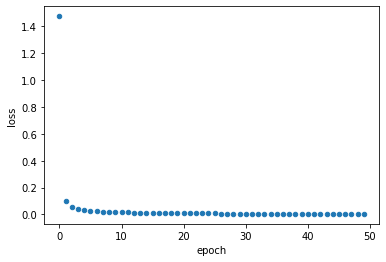

In [14]:
pd.DataFrame({
    'epoch': history.epoch,
    'loss': history.history['loss']
}).plot.scatter(x='epoch', y='loss')

## Learning rate and momentum

In [15]:
# define the keras model
model = Sequential()
model.add(Dense(units=1, input_dim=1, activation = "sigmoid"))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.2))

# fit the model
model.fit(X, y, epochs=10)

Epoch 1/10
32/32 [==============================] - 0s 654us/step - loss: 0.0269
Epoch 2/10
32/32 [==============================] - 0s 640us/step - loss: 0.0064
Epoch 3/10
32/32 [==============================] - 0s 674us/step - loss: 0.0041
Epoch 4/10
32/32 [==============================] - 0s 734us/step - loss: 0.0031
Epoch 5/10
32/32 [==============================] - 0s 612us/step - loss: 0.0025
Epoch 6/10
32/32 [==============================] - 0s 625us/step - loss: 0.0021
Epoch 7/10
32/32 [==============================] - 0s 570us/step - loss: 0.0018
Epoch 8/10
32/32 [==============================] - 0s 550us/step - loss: 0.0016
Epoch 9/10
32/32 [==============================] - 0s 664us/step - loss: 0.0014
Epoch 10/10
32/32 [==============================] - 0s 563us/step - loss: 0.0013


In [16]:
# define the keras model
model = Sequential()
model.add(Dense(units=1, input_dim=1, activation = "sigmoid"))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.5))

# fit the model
model.fit(X, y, epochs=10)

Epoch 1/10
32/32 [==============================] - 0s 652us/step - loss: 0.0921
Epoch 2/10
32/32 [==============================] - 0s 653us/step - loss: 0.0400
Epoch 3/10
32/32 [==============================] - 0s 642us/step - loss: 0.0272
Epoch 4/10
32/32 [==============================] - 0s 675us/step - loss: 0.0210
Epoch 5/10
32/32 [==============================] - 0s 758us/step - loss: 0.0172
Epoch 6/10
32/32 [==============================] - 0s 569us/step - loss: 0.0147
Epoch 7/10
32/32 [==============================] - 0s 695us/step - loss: 0.0128
Epoch 8/10
32/32 [==============================] - 0s 696us/step - loss: 0.0114
Epoch 9/10
32/32 [==============================] - 0s 787us/step - loss: 0.0103
Epoch 10/10
32/32 [==============================] - 0s 657us/step - loss: 0.0094


## Non-linear Patterns

<AxesSubplot:xlabel='X', ylabel='y'>

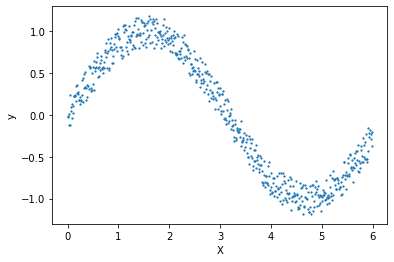

In [17]:
df = pd.DataFrame({
    'X': np.arange(0, 6, 0.01),
    'y': np.sin(np.arange(0, 6, 0.01))
})

# add random noise to response variable
e = np.random.uniform(-0.2, 0.2, (df.shape[0], 1))
df[['y']] = df[['y']] + e

# plot
df.plot.scatter(x='X', y='y', s=1.5)

In [18]:
X = df[['X']]
y = df['y']

In [19]:
# define the keras model
model = Sequential()
model.add(Dense(units=16, input_dim=1, activation = "relu"))
model.add(Dense(units=1))

# compile the keras model
model.compile(loss='mse', optimizer=SGD(learning_rate=0.01, momentum=0.9))

# fit the model
model.fit(X, y, batch_size=32, epochs=50, verbose=False)

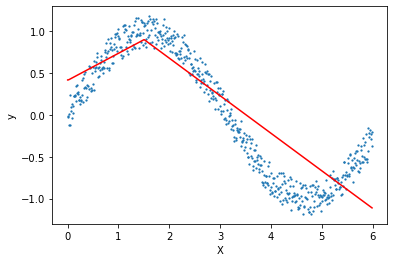

In [20]:
df[['pred']] = model.predict(X)
# plot
df.plot.scatter(x='X', y='y', s=1.5)
plt.plot(df[['X']], df[['pred']], c='red')

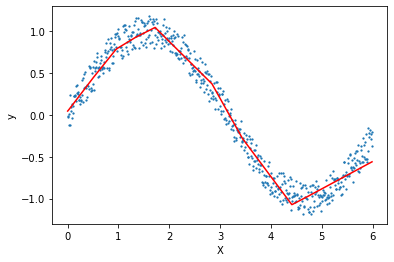

In [21]:
# define the keras model
model = Sequential()
model.add(Dense(units=16, input_dim=1, activation="relu"))
model.add(Dense(units=16, activation="relu"))
model.add(Dense(units=1))

# compile the keras model
model.compile(loss='mse', optimizer=SGD(learning_rate=0.01, momentum=0.9))

# fit the model
model.fit(X, y, batch_size=16, epochs=50, verbose=False)
          
# plot results
df[['pred']] = model.predict(X)
# plot
df.plot.scatter(x='X', y='y', s=1.5)
plt.plot(df[['X']], df[['pred']], c='red')

## Multi-predictor Multi-class Classification

In [22]:
X, y = make_blobs(n_samples=2000, centers=4, n_features=3)

In [23]:
# categorical encoding of y array
y = utils.to_categorical(y)
y

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [24]:
X.shape[1]

3

In [25]:
y.shape

(2000, 4)

### Fit model using validation

In [26]:
# define the keras model
model = Sequential()
model.add(Dense(units=16, input_dim=X.shape[1], activation="relu"))
model.add(Dense(units=y.shape[1], activation='softmax'))

# compile the keras model
model.compile(
    loss='categorical_crossentropy', 
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    metrics='accuracy'
)

# fit the model
history = model.fit(X, y, batch_size=32, epochs=20, validation_split=0.2, verbose=False)

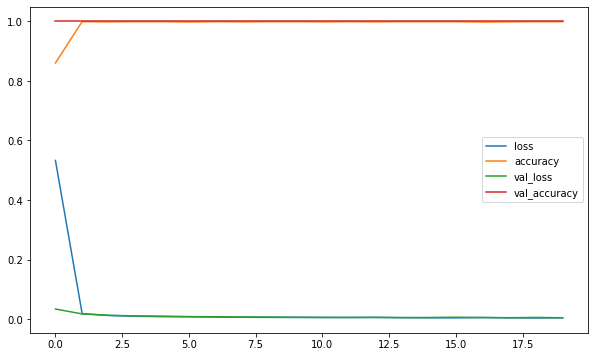

In [27]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.show()